Z-Score Standardization
Z-Score standardization transforms scores into a standard normal distribution (mean = 0, standard deviation = 1). It’s particularly useful if the data are not uniformly distributed.

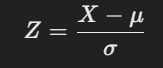

Where
𝑋
X is the individual score,
𝜇
μ is the mean of the factor, and
𝜎
σ is the standard deviation of the factor.

# Calculate livability index for the whole Municipality

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 2, 3], 1]
culture_data = culture_data.iloc[[1, 2, 3, 4, 5, 6, 7], 1]
economy_data = economy_data.iloc[[1, 2, 3, 4, 5], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]

print(culture_data)

#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Porto_Global.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1    40.0
2    74.0
3    53.0
4    12.0
5    28.0
6     6.0
7    12.8
Name: Year, dtype: float64
-0.3343018528892765

Sum of all weighted Z-scores: 2.0555958602886846

Sigmoid of the sum of weighted Z-scores: 0.8865118292619506

Scaled Sigmoid (0-100): 88.65118292619506
Results exported to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Porto_Global.csv


##Create bar plot for Porto results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/porto_livability_plot.png


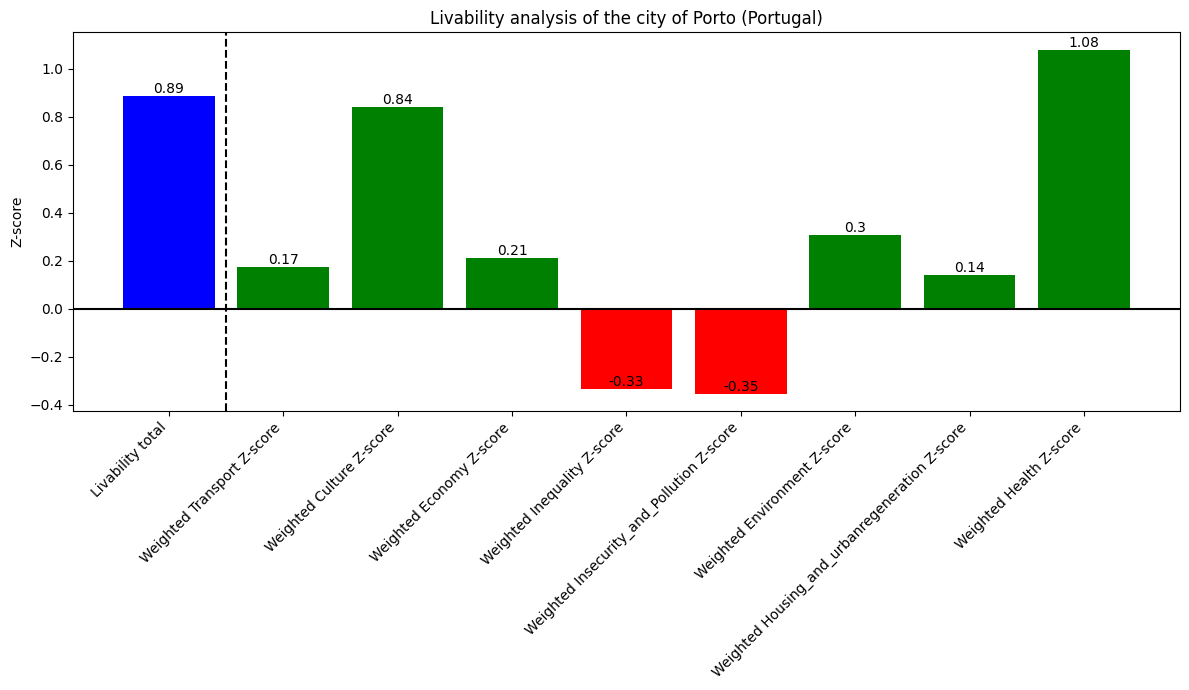

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Porto_Global.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the city of Porto (Portugal)')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/porto_livability_plot.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/porto_livability_plot.png")
plt.show()

In [ ]:
# prompt: create correlation matrix for /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Porto_Global.csv

import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Porto_Global.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

correlation_matrix

,Weighted Transport Z-score,Weighted Culture Z-score,Weighted Economy Z-score,Weighted Inequality Z-score,Weighted Insecurity_and_Pollution Z-score,Weighted Environment Z-score,Weighted Housing_and_urbanregeneration Z-score,Weighted Health Z-score,Sum of Weighted Z-scores,Sigmoid of Weighted Sum,Scaled Weighted Sigmoid
Weighted Transport Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Culture Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Economy Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Inequality Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Insecurity_and_Pollution Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Environment Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Housing_and_urbanregeneration Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weighted Health Z-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sum of Weighted Z-scores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sigmoid of Weighted Sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 5], 1]
culture_data = culture_data.iloc[[1, 7, 14, 22, 30, 38, 46], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 7], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]

print(culture_data)

#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Union of the parishes of Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau and Vitória')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória.png")
plt.show()

#Ramalde

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 6], 1]
culture_data = culture_data.iloc[[1, 7, 12, 20, 28, 36, 44], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 7, 12], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]

print(culture_data)

#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Ramalde.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Ramalde.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Ramalde parish')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Ramalde.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Ramalde.png")
plt.show()

#União das freguesias de Lordelo do Ouro e Massarelos


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 7], 1]
culture_data = culture_data.iloc[[1, 7, 15, 23, 31, 39, 47], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 7, 11], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]

print(culture_data)

#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Lordelo do Ouro e Massarelos.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Lordelo do Ouro e Massarelos.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Union of the parishes of Lordelo do Ouro and Massarelos')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Lordelo do Ouro e Massarelos.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Lordelo do Ouro e Massarelos.png")
plt.show()

#Bonfim

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 8], 1]
culture_data = culture_data.iloc[[1, 7, 9, 17, 25, 33, 41], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 8], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]


#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Bonfim.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Bonfim.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Bonfim parish')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Bonfim.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Bonfim.png'")
plt.show()

#União das freguesias de Aldoar, Foz do Douro e Nevogilde


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 9], 1]
culture_data = culture_data.iloc[[1, 7, 13, 21, 29, 37, 45], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 10], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]


#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Aldoar, Foz do Douro e Nevogilde.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#União das freguesias de Aldoar, Foz do Douro e Nevogilde.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Union of the parishes of Aldoar, Foz do Douro and Nevogilde')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Aldoar, Foz do Douro e Nevogilde.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#União das freguesias de Aldoar, Foz do Douro e Nevogilde.png'")
plt.show()

#Paranhos

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 10], 1]
culture_data = culture_data.iloc[[1, 7, 11, 19, 27, 35, 43], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 7, 13], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]


#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Paranhos.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-0.3343018528892765

Sum of all weighted Z-scores: 1.7424766321918659

Sigmoid of the sum of weighted Z-scores: 0.851001370636699

Scaled Sigmoid (0-100): 85.1001370636699
Results exported to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Paranhos.csv


##bar plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Paranhos.png'


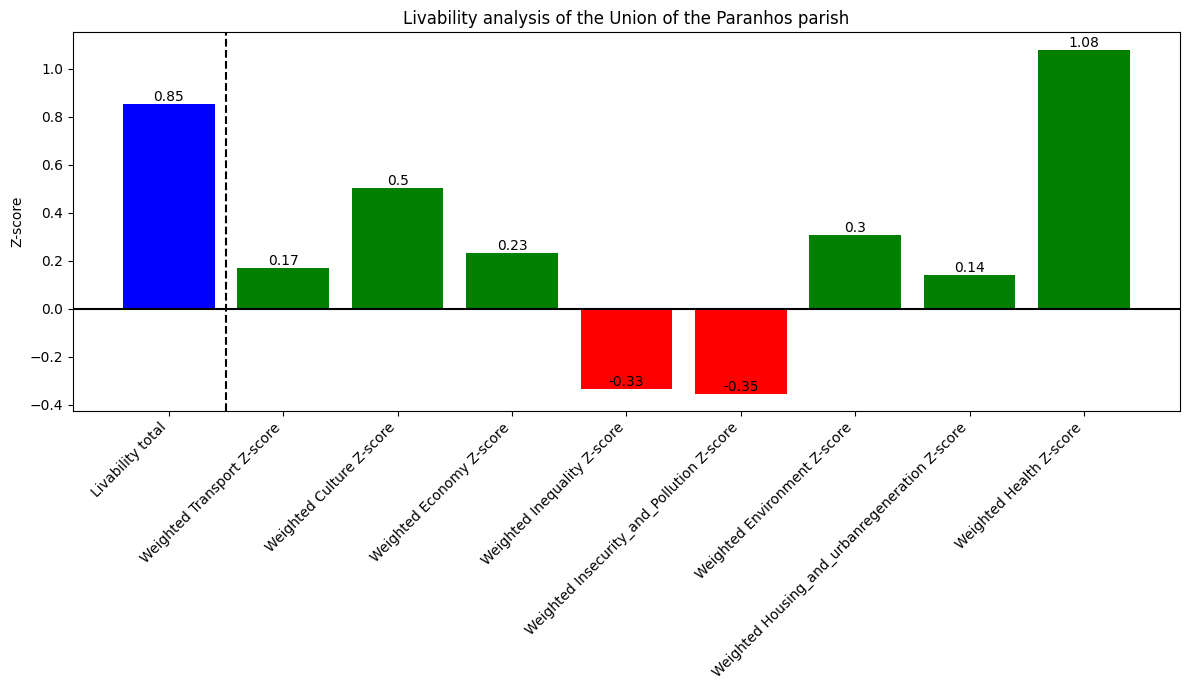

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Paranhos.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Union of the Paranhos parish')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Paranhos.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Paranhos.png'")
plt.show()

#Campanhã

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

# Mount gdrive
drive.mount('/content/drive')

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Import CSV files
try:
  transport_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_Transport_and_communications - Sheet1.csv')
  culture_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_culture_and_leisure - Sheet1.csv')
  economy_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Economic_vitality - Pivot Table 1 (1).csv.csv')
  inequality_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/V2_inequalityandcommutingtime - Sheet1 (3).csv')
  insecurity_and_pollution_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_security_and pollution - Sheet1.csv')
  environment_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_Environment - Pivot Table 1 (1).csv')
  housing_and_urbanregeneration_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_housing_and_urbanregeneration - v2_housing_and_urbanregeneration.csv')
  health_data = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/v3/v3_CSVs/v2_health - Sheet1.csv')
except FileNotFoundError:
  print("One or more CSV files not found. Please ensure they are in the same directory.")
  exit()


# Extract values from CSV files
transport_data = transport_data.iloc[[1, 3, 11], 1]
culture_data = culture_data.iloc[[1, 7, 10, 18, 26, 34, 42], 1]
economy_data = economy_data.iloc[[1, 2, 4, 5, 9], 1]
inequality_data = inequality_data.iloc[[0, 1, 2], 1]
insecurity_and_pollution_data = insecurity_and_pollution_data.iloc[[0, 1, 2, 3], 1]
environment_data = environment_data.iloc[[1, 2 ,3], 1]
housing_and_urbanregeneration_data = housing_and_urbanregeneration_data.iloc[[0, 1, 2], 1]
health_data = health_data.iloc[[1, 2, 3, 4, 5], 1]


#Calculte Zscore for each category
transport_zscore = (np.sum(transport_data) - np.mean(transport_data)) / np.std(transport_data)
culture_zscore = (np.sum(culture_data) - np.mean(culture_data)) / np.std(culture_data)
economy_zscore = (np.sum(economy_data) - np.mean(economy_data)) / np.std(economy_data)
inequality_zscore = (np.sum(inequality_data) - np.mean(inequality_data)) / np.std(inequality_data)
insecurity_and_pollution_zscore = (np.sum(insecurity_and_pollution_data) - np.mean(insecurity_and_pollution_data)) / np.std(insecurity_and_pollution_data)
environment_zscore = (np.sum(environment_data) - np.mean(environment_data)) / np.std(environment_data)
housing_and_urbanregeneration_zscore = (np.sum(housing_and_urbanregeneration_data) - np.mean(housing_and_urbanregeneration_data)) / np.std(housing_and_urbanregeneration_data)
health_zscore = (np.sum(health_data) - np.mean(health_data)) / np.std(health_data)

#Calculate weighted Zscore
weighted_transport_zscore = transport_zscore * 0.10
weighted_culture_zscore = culture_zscore * 0.10
weighted_economy_zscore = economy_zscore * 0.10
weighted_inequality_zscore = inequality_zscore * 0.10
weighted_insecurity_and_pollution_zscore = insecurity_and_pollution_zscore * 0.15
weighted_environment_zscore = environment_zscore * 0.20
weighted_housing_and_urbanregeneration_zscore = housing_and_urbanregeneration_zscore * 0.10
weighted_health_zscore = health_zscore * 0.15

adjusted_weighted_inequality_zscore = weighted_inequality_zscore * -1
print(adjusted_weighted_inequality_zscore)
adjusted_weighted_insecurity_and_pollution_zscore = weighted_insecurity_and_pollution_zscore * -1

# Calculate the sum of all weighted z-scores
sum_of_weighted_zscores = np.sum(weighted_transport_zscore + weighted_culture_zscore +
                          weighted_economy_zscore + adjusted_weighted_inequality_zscore +
                          adjusted_weighted_insecurity_and_pollution_zscore +
                          weighted_environment_zscore +
                          weighted_housing_and_urbanregeneration_zscore +
                          weighted_health_zscore)


# Calculate the sigmoid of the sum of weighted z-scores
sigmoid_of_weighted_sum = sigmoid(sum_of_weighted_zscores)

# Print the result
print("\nSum of all weighted Z-scores:", sum_of_weighted_zscores)
print("\nSigmoid of the sum of weighted Z-scores:", sigmoid_of_weighted_sum)

# Scale the sigmoid result to a 0-100 range
scaled_sigmoid = sigmoid_of_weighted_sum * 100

# Print the scaled result
print("\nScaled Sigmoid (0-100):", scaled_sigmoid)

# Update the results dictionary with weighted z-scores and sigmoid
results = ({
    'Weighted Transport Z-score': weighted_transport_zscore,
    'Weighted Culture Z-score': weighted_culture_zscore,
    'Weighted Economy Z-score': weighted_economy_zscore,
    'Weighted Inequality Z-score': adjusted_weighted_inequality_zscore,
    'Weighted Insecurity_and_Pollution Z-score': adjusted_weighted_insecurity_and_pollution_zscore,
    'Weighted Environment Z-score': weighted_environment_zscore,
    'Weighted Housing_and_urbanregeneration Z-score': weighted_housing_and_urbanregeneration_zscore,
    'Weighted Health Z-score': weighted_health_zscore,
    'Sum of Weighted Z-scores': sum_of_weighted_zscores,
    'Sigmoid of Weighted Sum': sigmoid_of_weighted_sum,
    'Scaled Weighted Sigmoid': scaled_sigmoid
})

# Convert updated results to DataFrame
results_df = pd.DataFrame([results])

# Export to CSV (you can change the file name if needed)
output_file = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Campanhã.csv'
results_df.to_csv(output_file, index=False)
print(f"Results exported to {output_file}")

##bar plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: File not found at /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Campanhã.csv


TypeError: '>=' not supported between instances of 'str' and 'int'

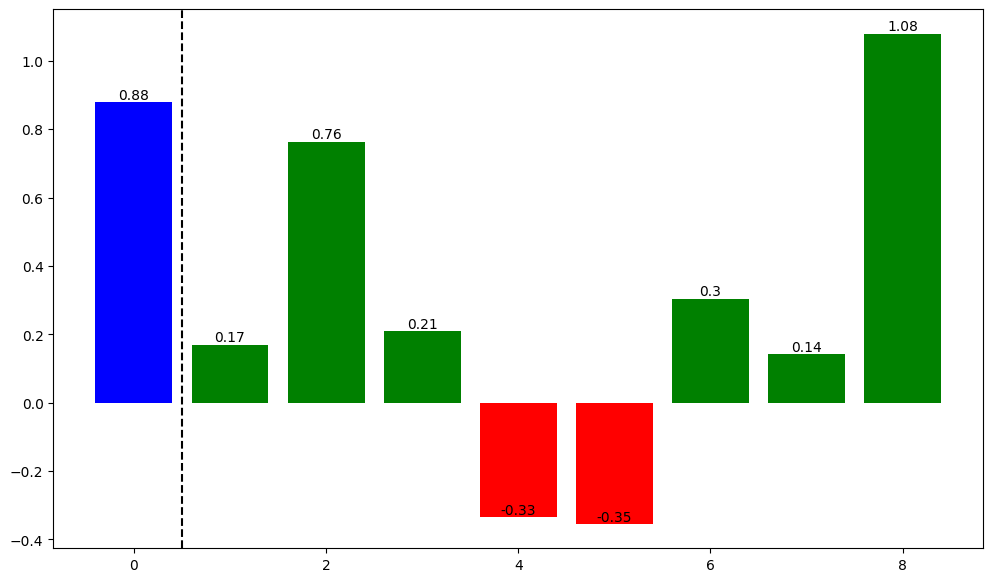

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/#Campanhã.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Plotting
plt.figure(figsize=(12, 7))
# Plot "Sigmoid of Weighted Sum" in blue
plt.bar(0, df['Sigmoid of Weighted Sum'].iloc[0], color='blue', label='Livability index')
plt.text(0, df['Sigmoid of Weighted Sum'].iloc[0], str(round(df['Sigmoid of Weighted Sum'].iloc[0],2)), ha='center', va='bottom')


# Add a vertical line separator
plt.axvline(x=0.5, color='black', linestyle='--')

# Plot other columns (except "Sum of Weighted Z-scores" and "Scaled Weighted Sigmoid")
# Create a single boolean mask to filter the columns
columns_to_plot = [col for col in df.columns if col not in ["Sum of Weighted Z-scores", "Scaled Weighted Sigmoid", "Sigmoid of Weighted Sum"]]
x_pos = np.arange(1, len(columns_to_plot) + 1)

for i, col in enumerate(columns_to_plot):
    color = 'green' if df[col].iloc[0] >= 0 else 'red'
    plt.bar(x_pos[i], df[col].iloc[0], color=color, label=col)
    plt.text(x_pos[i], df[col].iloc[0], str(round(df[col].iloc[0], 2)), ha='center', va='bottom')

# Customize the plot
plt.xticks(np.concatenate((np.array([0]), x_pos)),
           np.concatenate((np.array(['Livability total']), columns_to_plot)),
           rotation=45, ha='right')
plt.ylabel('Z-score')
plt.title('Livability analysis of the Union of the Campanhã parish')
# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # Adjust legend position
plt.tight_layout()
# Save the plot to Google Drive
plt.savefig('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Campanhã.png')
print("Plot saved to /content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/IMAGES/#Campanhã.png'")
plt.show()

#Parishes comparison bar plot

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


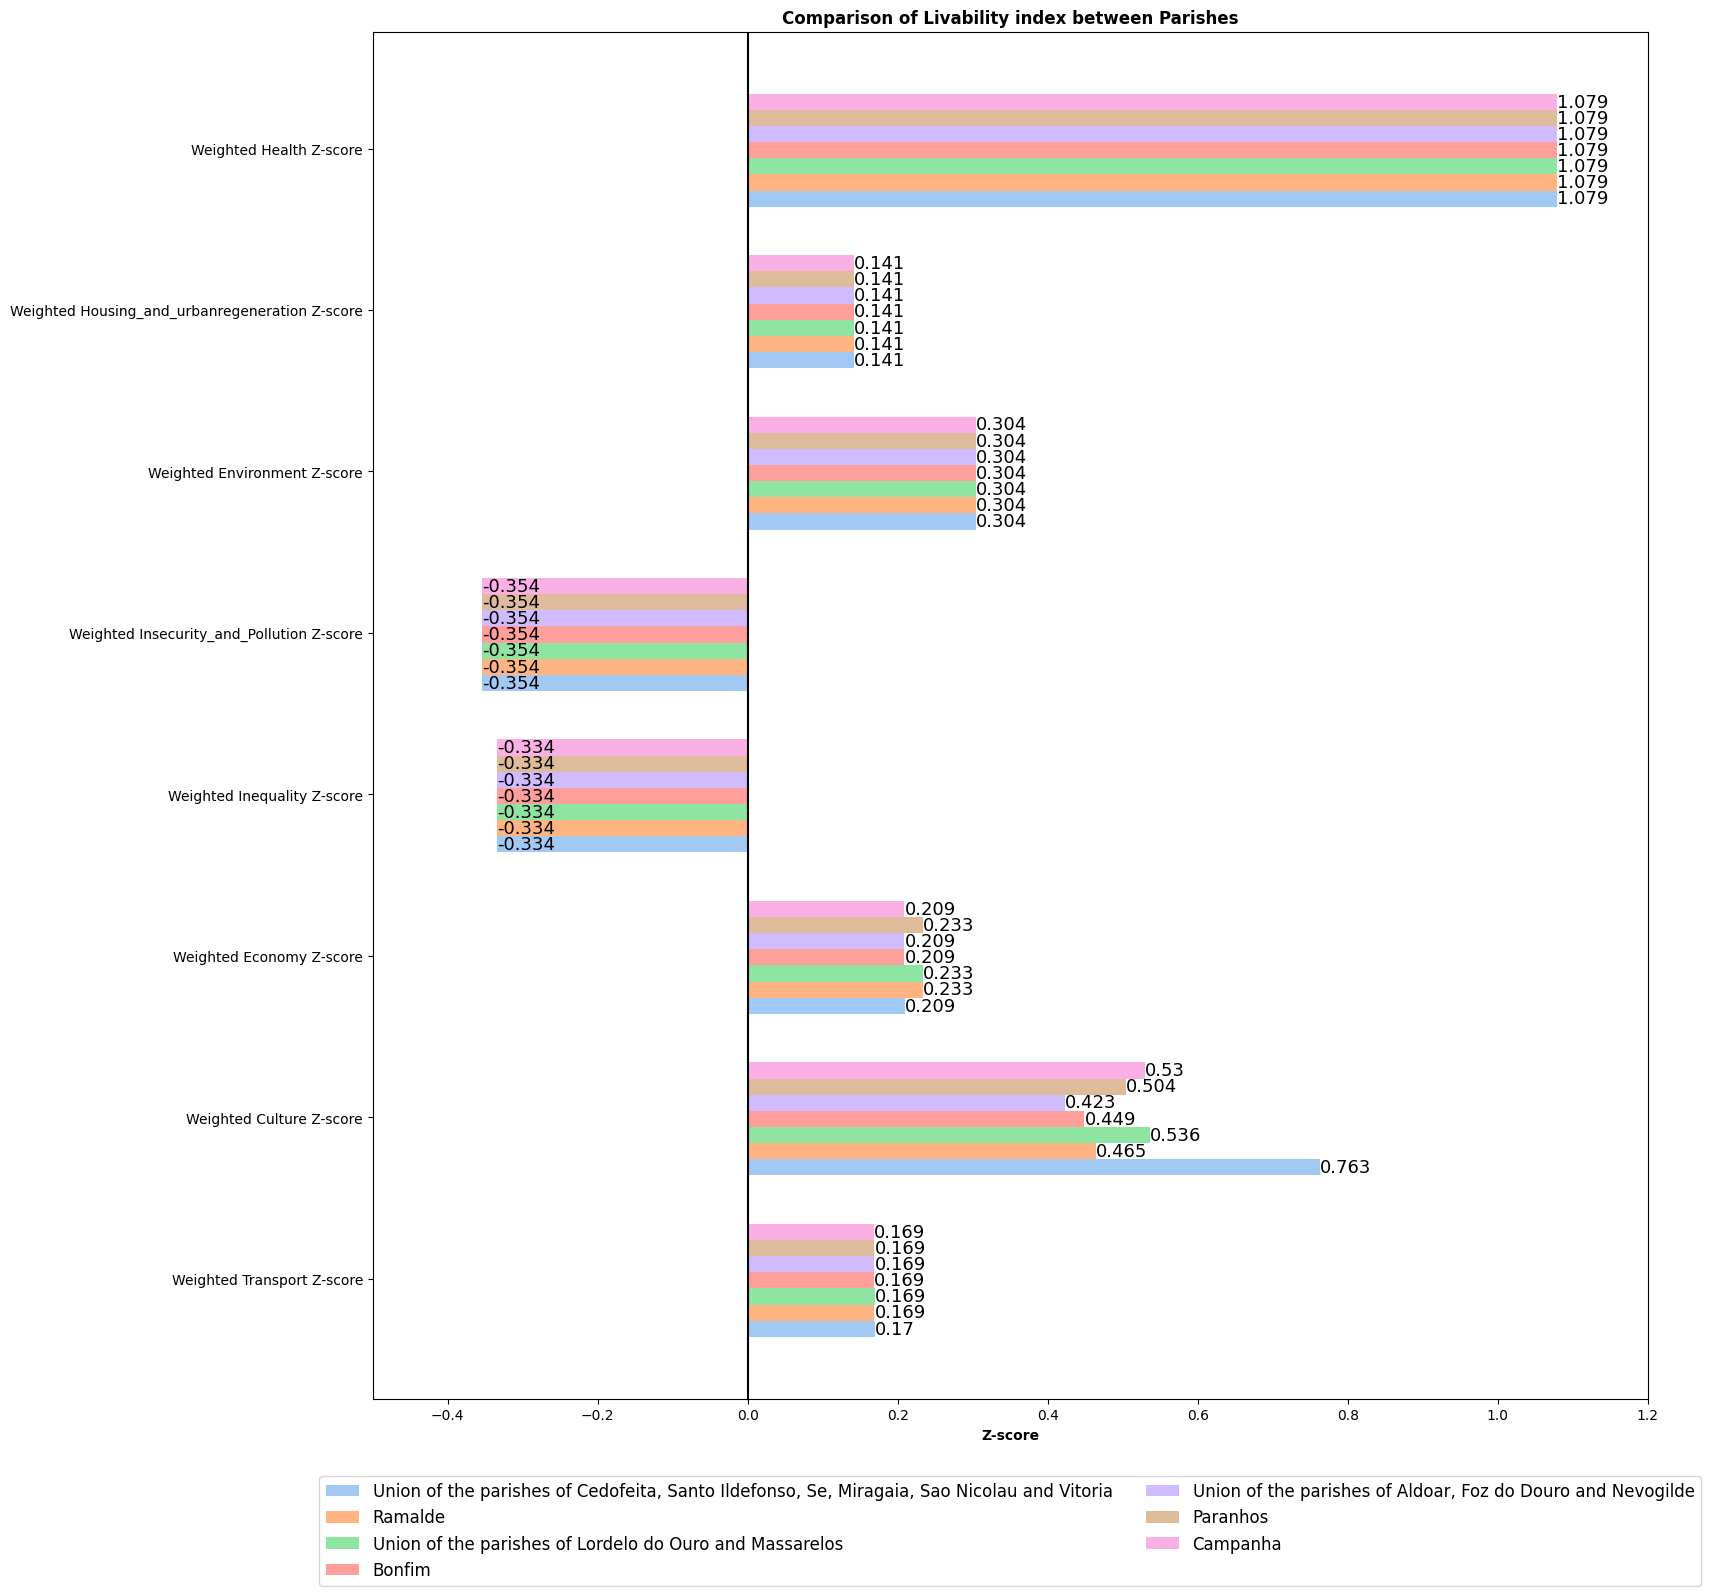

In [ ]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Mount Google Drive
drive.mount('/content/drive')

# Function to identify non-prime numbers
def is_not_prime(n):
    result = False
    for i in range(2,int(math.sqrt(n)) + 1):
        if n % i == 0:
            result = True
    return result

# Load the data
file_path = '/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Parishes/Parish_results_map - combined_results.csv'
try:
    combined_df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

if combined_df.empty:
    print("Error: The file 'Parish_results_map - combined_results.csv' is empty.")
    exit()

# Define the list of columns to plot
columns_to_plot = ['Weighted Transport Z-score', 'Weighted Culture Z-score',
                   'Weighted Economy Z-score', 'Weighted Inequality Z-score',
                   'Weighted Insecurity_and_Pollution Z-score',
                   'Weighted Environment Z-score',
                   'Weighted Housing_and_urbanregeneration Z-score',
                   'Weighted Health Z-score']
# Define num_parishes
num_parishes = len(combined_df['Freguesia'].unique())
# Define width
width = 0.10  # Adjust width as needed

# Initialize x as a NumPy array
x = np.arange(len(columns_to_plot))

# Define a bright color palette from seaborn
colors = sns.color_palette('pastel', num_parishes)  # Bright palette for distinct colors

# Plotting
plt.figure(figsize=(17, 16))  # Adjust the figure size

for i, parish in enumerate(combined_df['Freguesia'].unique()):
    parish_df = combined_df[combined_df['Freguesia'] == parish]
    for j, col in enumerate(columns_to_plot):
        # Horizontal Bar Plot
        plt.barh(
            x[j] + i * width,
            parish_df[col].iloc[0],
            height=width,
            label=parish if j == 0 else "",
            color=colors[i]  # Use seaborn bright palette color
        )
        # Add Text Labels
        plt.text(
            parish_df[col].iloc[0],
            x[j] + i * width,
            str(round(parish_df[col].iloc[0], 3)),
            va='center',
            ha='left',
            fontsize=13
        )


# Customize plot
plt.yticks(x + width * (num_parishes / 2 - 0.4), columns_to_plot)
plt.xlabel('Z-score', fontweight='bold')
plt.title('Comparison of Livability index between Parishes', fontweight='bold')
plt.xlim(-0.5, 1.2)
plt.axvline(x=0, color='black', linestyle='-')
#plt.legend(loc='best', fontsize = 10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

plt.tight_layout()
plt.show()

#Map of parishes scores

##more detailed basemap

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from branca.element import Template, MacroElement
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Load the data
results_df = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Parishes/Parish_results_map - combined_results.csv')
porto_gdf = gpd.read_file('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/shapefile/Portov2.gpkg')

# Merge the dataframes
merged_df = pd.merge(porto_gdf, results_df, left_on='Freguesia', right_on='Freguesia', how='left')

# Create a folium map centered on Porto
m = folium.Map(location=[41.1579, -8.6291], zoom_start=13)

# Create a colormap
unique_freguesias = merged_df['Freguesia'].unique()
num_freguesias = len(unique_freguesias)
cmap = cm.get_cmap('plasma', num_freguesias)

# Add a GeoJson layer to the map
for index, row in merged_df.iterrows():
    freguesia = row['Freguesia']
    livability_index = row['Scaled Weighted Sigmoid']
    color = colors.rgb2hex(cmap(np.where(unique_freguesias == freguesia)[0][0])[:3])  # Get the color for this freguesia

    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6,
        },
        tooltip=f"<b>Freguesia:</b> {freguesia}<br><b>Livability Index:</b> {livability_index}",
    ).add_to(m)

# Create custom legend with values
template = """
{% macro html(this, kwargs) %}
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  <script>
  $(function() {
    $("#maplegend").draggable({
        start: function (event, ui) {
            $(this).css({
                right: "auto",
                top: "auto",
                bottom: "auto"
            });
        }
    });
  });
  </script>
</head>
<body>
<div id='maplegend' class='maplegend'
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Porto parishes livability index</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
"""

for i, freguesia in enumerate(unique_freguesias):
    color = colors.rgb2hex(cmap(i)[:3])
    value = merged_df.loc[merged_df['Freguesia'] == freguesia, 'Scaled Weighted Sigmoid'].iloc[0]
    template += f"<li><span style='background:{color};opacity:0.7;'></span>{freguesia}: {value:.2f}</li>"

template += """
  </ul>
</div>
</div>
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #ccc;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)
m.get_root().add_child(macro)

m


/tmp/ipython-input-3529888774.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', num_freguesias)


##less detailed basemap

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from branca.element import Template, MacroElement
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# Load the data
results_df = pd.read_csv('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/RESULTS/Parishes/Parish_results_map - combined_results.csv')
porto_gdf = gpd.read_file('/content/drive/MyDrive/Profissional/Doutoramento/Gestão PhD/Artigos e Fichas leitura_PhD/urban livability_PORTO/DATA/shapefile/Portov2.gpkg')

# Merge the dataframes
merged_df = pd.merge(porto_gdf, results_df, left_on='Freguesia', right_on='Freguesia', how='left')

# Create a folium map centered on Porto with a simpler basemap
m = folium.Map(location=[41.1579, -8.6291], zoom_start=13, tiles='CartoDB positron')

# Create a colormap
unique_freguesias = merged_df['Freguesia'].unique()
num_freguesias = len(unique_freguesias)
cmap = cm.get_cmap('plasma', num_freguesias)

# Add a GeoJson layer to the map
for index, row in merged_df.iterrows():
    freguesia = row['Freguesia']
    livability_index = row['Scaled Weighted Sigmoid']
    color = colors.rgb2hex(cmap(np.where(unique_freguesias == freguesia)[0][0])[:3])  # Get the color for this freguesia

    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6,
        },
        tooltip=f"<b>Freguesia:</b> {freguesia}<br><b>Livability Index:</b> {livability_index}",
    ).add_to(m)

# Create custom legend with values
template = """
{% macro html(this, kwargs) %}
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  <script>
  $(function() {
    $("#maplegend").draggable({
        start: function (event, ui) {
            $(this).css({
                right: "auto",
                top: "auto",
                bottom: "auto"
            });
        }
    });
  });
  </script>
</head>
<body>
<div id='maplegend' class='maplegend'
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Porto parishes livability index</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
"""

for i, freguesia in enumerate(unique_freguesias):
    color = colors.rgb2hex(cmap(i)[:3])
    value = merged_df.loc[merged_df['Freguesia'] == freguesia, 'Scaled Weighted Sigmoid'].iloc[0]
    template += f"<li><span style='background:{color};opacity:0.7;'></span>{freguesia}: {value:.2f}</li>"

template += """
  </ul>
</div>
</div>
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #ccc;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}
"""

macro = MacroElement()
macro._template = Template(template)
m.get_root().add_child(macro)

m


/tmp/ipython-input-4252982080.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', num_freguesias)
